In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load training data
train_url = "https://raw.githubusercontent.com/clairett/pytorch-sentiment-classification/master/data/SST2/train.tsv"
train_df = pd.read_csv(train_url, sep='\t')

# Load test data
test_url = "https://raw.githubusercontent.com/clairett/pytorch-sentiment-classification/master/data/SST2/test.tsv"
test_df = pd.read_csv(test_url, sep='\t')

# Split the training set into 80% train and 20% validation
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Display the sizes
print("Train size:", len(train_data))
print("Validation size:", len(val_data))
print("Test size:", len(test_df))

# Optional: show a few samples
print("\nSample training data:")
print(train_data.head())

print("\nSample test data:")
print(test_df.head())

Train size: 5535
Validation size: 1384
Test size: 1820

Sample training data:
     a stirring , funny and finally transporting re imagining of beauty and the beast and 1930s horror films  \
26                                              too bad                                                        
3484  rife with nutty cliches and far too much dialogue                                                        
63    admirers of director abel ferrara may be relie...                                                        
1044  the enjoyable undercover brother , a zany mix ...                                                        
2594  knockaround guys plays like a student film by ...                                                        

      1  
26    0  
3484  0  
63    1  
1044  1  
2594  0  

Sample test data:
        no movement , no yuks , not much of anything  0
0  a gob of drivel so sickly sweet , even the eag...  0
1  gangs of new york is an unapologetic mess , wh...  0
2 

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SentimentClassifier(nn.Module):
    def __init__(self, input_size=10000, hidden_sizes=[512, 256, 128, 64], output_size=2, dropout_prob=0.3):
        super(SentimentClassifier, self).__init__()

        # Layer 1: Input to first hidden layer
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])

        # Layer 2: First to second hidden layer
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])

        # Layer 3: Second to third hidden layer
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])

        # Layer 4: Third to fourth hidden layer
        self.fc4 = nn.Linear(hidden_sizes[2], hidden_sizes[3])

        # Layer 5: Final output layer
        self.fc5 = nn.Linear(hidden_sizes[3], output_size)

        # Dropout layer
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        # Layer 1 with ReLU and dropout
        x = self.dropout(F.relu(self.fc1(x)))

        # Layer 2 with ReLU and dropout
        x = self.dropout(F.relu(self.fc2(x)))

        # Layer 3 with ReLU and dropout
        x = self.dropout(F.relu(self.fc3(x)))

        # Layer 4 with ReLU and dropout
        x = self.dropout(F.relu(self.fc4(x)))

        # Final output layer (no activation here, will use CrossEntropyLoss)
        x = self.fc5(x)

        return x

# Initialize the model
model = SentimentClassifier()

# Print model summary
print(model)

# Count total parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal trainable parameters: {total_params:,}")

SentimentClassifier(
  (fc1): Linear(in_features=10000, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=2, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

Total trainable parameters: 5,293,122


In [3]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SentimentClassifier(nn.Module):
    def __init__(self, input_size=10000, hidden_sizes=[512, 256, 128, 64], output_size=2, dropout_prob=0.3):
        super(SentimentClassifier, self).__init__()

        # Layer 1: Input → 512
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])

        # Layer 2: 512 → 256
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])

        # Layer 3: 256 → 128
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])

        # Layer 4: 128 → 64
        self.fc4 = nn.Linear(hidden_sizes[2], hidden_sizes[3])

        # Layer 5: 64 → 2 (output)
        self.fc5 = nn.Linear(hidden_sizes[3], output_size)

        # Dropout layer
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.dropout(F.relu(self.fc4(x)))
        x = self.fc5(x)  # No activation (CrossEntropyLoss handles it)
        return x

# Initialize model
model = SentimentClassifier()

# Count trainable parameters
total_params = count_parameters(model)
print(f"Total trainable parameters: {total_params:,}")

# Breakdown per layer (optional)
print("\nParameter breakdown per layer:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.numel():,}")

Total trainable parameters: 5,293,122

Parameter breakdown per layer:
fc1.weight: 5,120,000
fc1.bias: 512
fc2.weight: 131,072
fc2.bias: 256
fc3.weight: 32,768
fc3.bias: 128
fc4.weight: 8,192
fc4.bias: 64
fc5.weight: 128
fc5.bias: 2


Epoch 1: Val Loss: 0.4687, Val Acc: 0.7934
Epoch 2: Val Loss: 0.5690, Val Acc: 0.7746
Epoch 3: Val Loss: 0.7391, Val Acc: 0.7702
Epoch 4: Val Loss: 1.2122, Val Acc: 0.7702
Epoch 5: Val Loss: 1.7207, Val Acc: 0.7724
Epoch 6: Val Loss: 1.9635, Val Acc: 0.7645
Epoch 7: Val Loss: 1.9368, Val Acc: 0.7645
Epoch 8: Val Loss: 1.9041, Val Acc: 0.7572
Epoch 9: Val Loss: 2.3219, Val Acc: 0.7536
Epoch 10: Val Loss: 2.7136, Val Acc: 0.7514


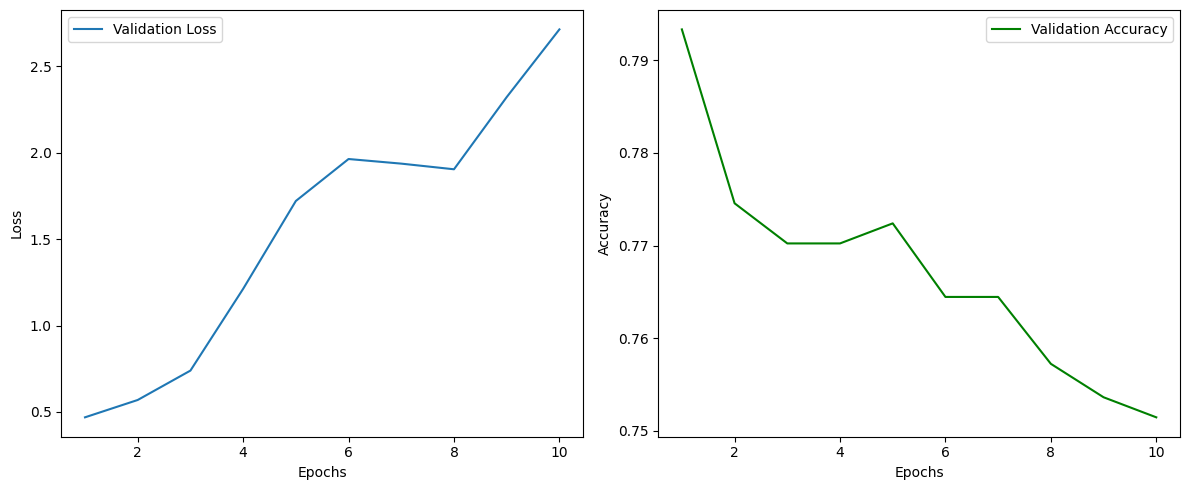

Best validation accuracy: 0.7934


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Model definition (same as before)
class SentimentClassifier(nn.Module):
    def __init__(self, input_size=10000, hidden_sizes=[512, 256, 128, 64], output_size=2, dropout_prob=0.3):
        super(SentimentClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.fc4 = nn.Linear(hidden_sizes[2], hidden_sizes[3])
        self.fc5 = nn.Linear(hidden_sizes[3], output_size)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.dropout(F.relu(self.fc4(x)))
        x = self.fc5(x)
        return x

# Data preparation
vectorizer = CountVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(train_data.iloc[:, 0])  # First column is text
y_train = train_data.iloc[:, 1].values  # Second column is label
X_val = vectorizer.transform(val_data.iloc[:, 0])
y_val = val_data.iloc[:, 1].values

# Convert to tensors
X_train = torch.tensor(X_train.toarray(), dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_val = torch.tensor(X_val.toarray(), dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# Training setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SentimentClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
best_val_acc = 0.0
val_accuracies = []
val_losses = []

for epoch in range(10):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    correct = 0
    total = 0
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc = correct / total
    val_loss /= len(val_loader)
    val_accuracies.append(val_acc)
    val_losses.append(val_loss)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'checkpoint.pt')

    print(f'Epoch {epoch+1}: Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('training_metrics.png')
plt.show()

print(f"Best validation accuracy: {best_val_acc:.4f}")

In [9]:
import torch.quantization

# Load the best saved model
model_fp32 = SentimentClassifier().to('cpu')
model_fp32.load_state_dict(torch.load('checkpoint.pt', map_location='cpu'))
model_fp32.eval()

# Dynamic Quantization to INT8 (weights only)
model_int8 = torch.quantization.quantize_dynamic(
    model_fp32,  # Original FP32 model
    {nn.Linear},  # Layers to quantize (all Linear layers)
    dtype=torch.qint8  # Quantization type (use torch.quint4x2 for INT4)
)

# For INT4 (4-bit) quantization (experimental, requires PyTorch 1.8+)
# Commenting out the INT4 quantization part because it's not supported for dynamic quantization of Linear layers.
# try:
#    model_int4 = torch.quantization.quantize_dynamic(
#        model_fp32,
#        {nn.Linear},
#        dtype=torch.quint4x2
#    )
# except AttributeError:
#    print("INT4 quantization requires PyTorch 1.8+")
#    model_int4 = None
model_int4 = None # Setting model_int4 to None to avoid errors in the following code

# Test inference with quantized models
sample_input = torch.randn(1, 10000)  # Example input
print("FP32 model size:", sum(p.numel() * p.element_size() for p in model_fp32.parameters()) / 1024, "KB")
print("INT8 model size:", sum(p.numel() * p.element_size() for p in model_int8.parameters()) / 1024, "KB")
if model_int4: # This condition will always be False now
    print("INT4 model size:", sum(p.numel() * p.element_size() for p in model_int4.parameters()) / 1024, "KB")

FP32 model size: 20676.2578125 KB
INT8 model size: 0.0 KB


In [10]:
# Convert to FP16
model_fp16 = SentimentClassifier().half().to('cuda' if torch.cuda.is_available() else 'cpu')
model_fp16.load_state_dict(torch.load('checkpoint.pt', map_location='cuda' if torch.cuda.is_available() else 'cpu'))
model_fp16.eval()

# Test FP16 inference
with torch.no_grad():
    sample_input = sample_input.half().to('cuda' if torch.cuda.is_available() else 'cpu')
    output_fp16 = model_fp16(sample_input)
    print("FP16 output:", output_fp16)

FP16 output: tensor([[ 2.3477, -1.5400]], dtype=torch.float16)



Inference Latency (ms):
FP32: 4.03ms
INT8: 2.22ms
FP16: 2.03ms


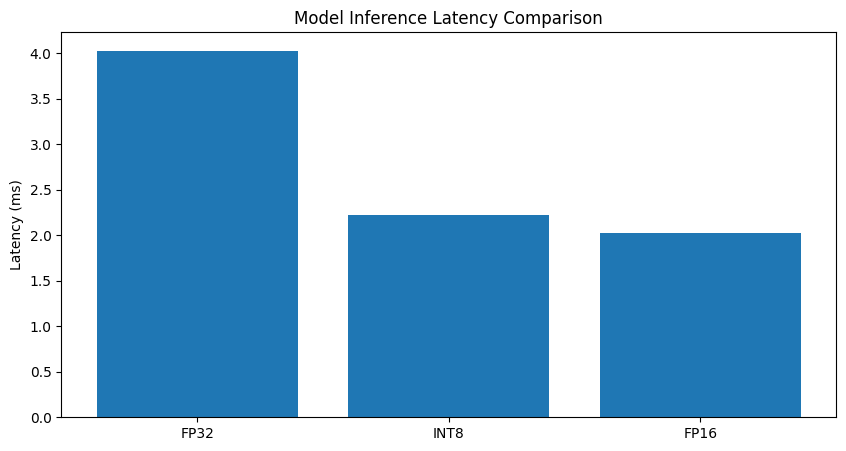

In [11]:
import time

def benchmark_model(model, input_data, num_runs=100):
    start = time.time()
    with torch.no_grad():
        for _ in range(num_runs):
            _ = model(input_data)
    return (time.time() - start) / num_runs

# Benchmark all models
input_fp32 = torch.randn(1, 10000)
results = {
    'FP32': benchmark_model(model_fp32, input_fp32),
    'INT8': benchmark_model(model_int8, input_fp32),
    'FP16': benchmark_model(model_fp16, input_fp32.half().to(next(model_fp16.parameters()).device))
}

if model_int4:
    results['INT4'] = benchmark_model(model_int4, input_fp32)

print("\nInference Latency (ms):")
for name, latency in results.items():
    print(f"{name}: {latency*1000:.2f}ms")

# Plot comparison
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), [v*1000 for v in results.values()])
plt.title('Model Inference Latency Comparison')
plt.ylabel('Latency (ms)')
plt.savefig('quantization_comparison.png')
plt.show()

In [13]:
!pip install pympler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 10.5 MB/s eta 0:00:00


In [16]:
import torch
from sklearn.metrics import accuracy_score

# 1. Load your test data (assuming X_test and y_test are prepared)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=64)

# 2. Evaluation function
def get_accuracy(model, test_loader, dtype=torch.float32, device='cpu'):
    model.to(device).eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device).to(dtype)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return accuracy_score(all_labels, all_preds) * 100

# 3. Load original FP32 model
model_fp32 = SentimentClassifier()
model_fp32.load_state_dict(torch.load('checkpoint.pt'))

# 4. Create quantized models
model_int8 = torch.quantization.quantize_dynamic(
    model_fp32,
    {nn.Linear},
    dtype=torch.qint8
)

model_fp16 = SentimentClassifier().half()
model_fp16.load_state_dict(torch.load('checkpoint.pt'))

# 5. Get accuracies
device = 'cuda' if torch.cuda.is_available() else 'cpu'

fp32_acc = get_accuracy(model_fp32, test_loader, torch.float32, device)
int8_acc = get_accuracy(model_int8, test_loader, torch.float32, device)  # Input stays FP32 for INT8
fp16_acc = get_accuracy(model_fp16, test_loader, torch.float16, device)

# 6. Print results
print(f"Original (FP32) Accuracy: {fp32_acc:.2f}%")
print(f"Dynamic (INT8) Accuracy: {int8_acc:.2f}%")
print(f"Half (FP16) Accuracy: {fp16_acc:.2f}%")

Original (FP32) Accuracy: 78.79%
Dynamic (INT8) Accuracy: 78.74%
Half (FP16) Accuracy: 78.79%
